In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Reading the data
data=pd.read_csv("C:/Users/PC PC/Desktop/DS Assignment/Ml projects/KNN Assignment/bangalore house price prediction OHE-data.csv")

In [3]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# processing the data
data.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [5]:
data.shape

(7120, 108)

In [6]:
data.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [7]:
data.dtypes

bath                           float64
balcony                        float64
price                          float64
total_sqft_int                 float64
bhk                              int64
                                ...   
location_Hosur Road              int64
location_Horamavu Banaswadi      int64
location_Domlur                  int64
location_Mahadevpura             int64
location_Tumkur Road             int64
Length: 108, dtype: object

In [8]:
# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [10]:
data.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855613,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data=data.rename({'area_typeSuper built-up  Area':"super_builtup_area",'area_typeBuilt-up  Area':"builtup_area",'area_typePlot  Area':"plot_area",'availability_Ready To Move':"available"},axis=1)
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='bhk', ylabel='price'>

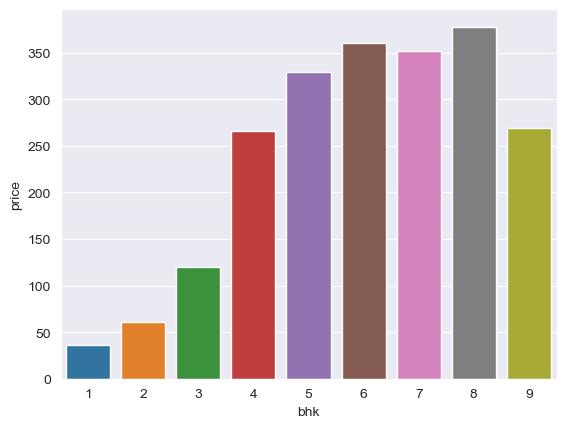

In [12]:
sns.barplot(x=data['bhk'],y=data['price'],errorbar=None)

<Axes: >

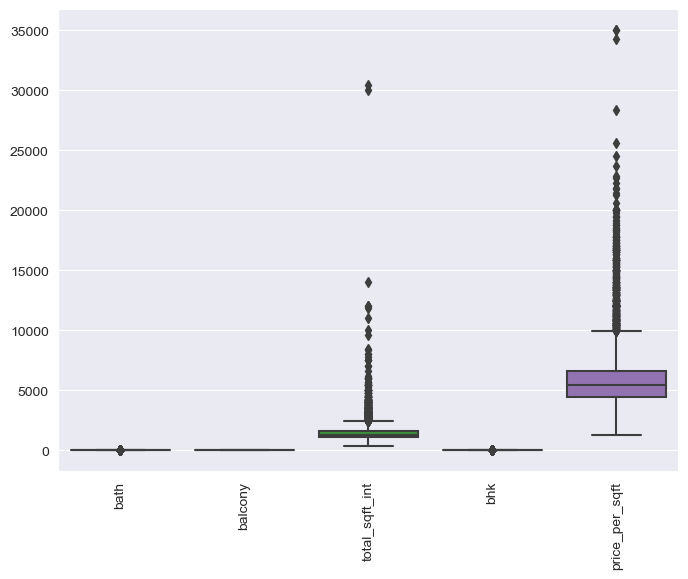

In [13]:

plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft']])

Text(0.5, 1.0, 'Count of BHKs')

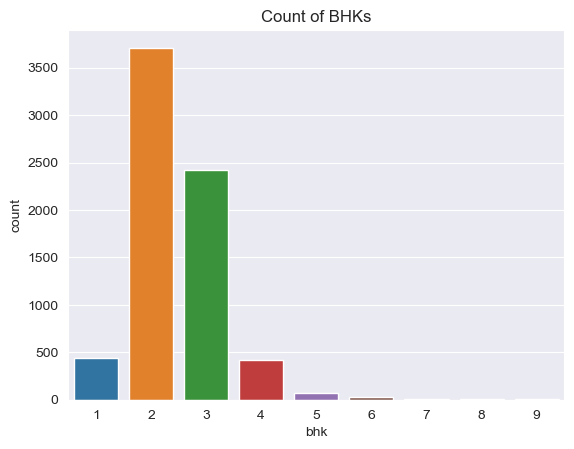

In [14]:
sns.countplot(x="bhk",data=data)
plt.title("Count of BHKs")

Text(0.5, 1.0, 'Comparing Price per sqft area of 2 BHK V/S 3 BHK')

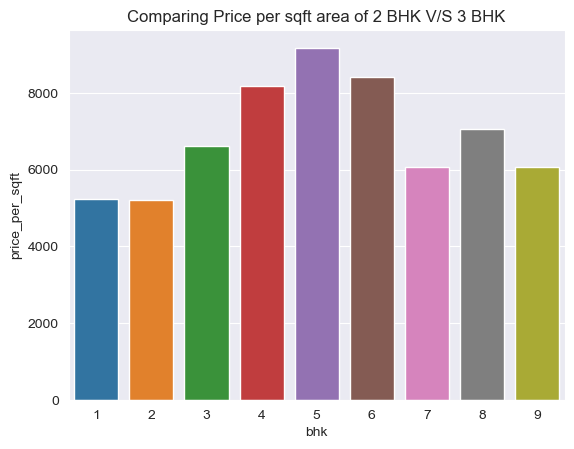

In [15]:
dfn=data[(data["bhk"]==2)|(data["bhk"]==3)]
sns.barplot(x="bhk",y="price_per_sqft",data=data,errorbar=None)
plt.title("Comparing Price per sqft area of 2 BHK V/S 3 BHK")

In [16]:
# Model Using KNN Regression

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X=data[['bath', 'balcony', 'total_sqft_int', 'bhk','price_per_sqft','super_builtup_area',
       'builtup_area', 'plot_area', 'available']]
y=data['price']



In [18]:
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test

print("Calling the train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)



Calling the train_test function--
(5696, 9)
(5696,)
(1424, 9)
(1424,)


In [19]:
def modelling(X_train,y_train,X_test):
    model=KNeighborsRegressor(n_neighbors=22)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed")
    pred_knn=model_train.predict(X_test)
    return pred_knn

print("Calling the modelling function--")
pred_knn=modelling(X_train,y_train,X_test)
print(pred_knn)


Calling the modelling function--
Model training is completed
[ 53.48727273  61.57954545  13.83522727 ... 127.45454545 212.86363636
  84.05727273]


In [20]:
r2score=(round(r2_score(y_test,pred_knn)*100,2))
print("--------------------------------------------")
print("KNN Regression--")
print('r2score:',r2score)
rmse = m.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE:',rmse)


--------------------------------------------
KNN Regression--
r2score: 92.95
RMSE: 25.060860078864206


In [21]:
from math import sqrt
import numpy as np
(len(data))
sqrt(len(data))

84.38009243891595

In [22]:
#error method
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))

In [23]:
error_rate

[0.03241125785288601,
 0.022330261793755635,
 0.0191415905478467,
 0.023778508914585772,
 0.02926064308926002,
 0.029614707325140044,
 0.03299015361477642,
 0.03675816254243425,
 0.041690771733994825,
 0.04034078794602314,
 0.04515473681936366,
 0.047531780442894744,
 0.048481512102481195,
 0.053298325337180374,
 0.057058806158247766,
 0.0552587378225452,
 0.057575606319733574,
 0.06256542143332533,
 0.06433495480403972,
 0.06680796237221864,
 0.0689749980391503,
 0.07052134272921196,
 0.07366165807157399,
 0.07622957602528346,
 0.0795401131899407,
 0.07712249240091706,
 0.07933155631888189,
 0.0821274398311771,
 0.08519316093392448,
 0.08700330829229952,
 0.08753187024178666,
 0.09004022159562652,
 0.09210795412803263,
 0.09299016965272555,
 0.09484860475911228,
 0.09774209124532929,
 0.09947367618297331,
 0.10078179993449243,
 0.10320713676589799,
 0.10544888399848418,
 0.10691116095776299,
 0.1079381787780258,
 0.10955389368938506,
 0.11177709349284415,
 0.11287940326741808,
 0.1140

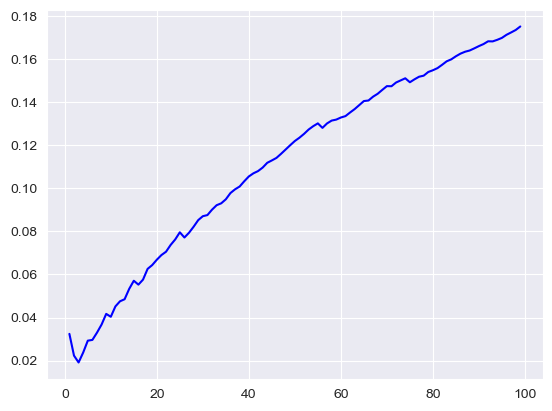

In [24]:
plt.plot(range(1,100),error_rate,color="blue")